In [1]:
import pandas as pd
import geopandas as gpd
import rasterio
from cartopy import crs
from cartopy.io.img_tiles import MapboxTiles
from shapely.geometry import Point
import folium

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,40)
token = 'pk.eyJ1IjoibWFwYm94IiwiYSI6ImNpejY4M29iazA2Z2gycXA4N2pmbDZmangifQ.-g_vE53SD2WrJ6tFX7QHmA'
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


# Mt. Rainier Snow Cover Locations

from JHRL/Ian

In [2]:
snowcover = pd.read_csv("../data/snow_summary_all_2009_2017_locs.csv")
snowcover['geometry'] = [Point(xy) for xy in zip(snowcover.longitude, snowcover.latitude)]
snowcover = gpd.GeoDataFrame(snowcover)
snowcover.crs = {"init" : 'epsg:4326'}
bounds = snowcover.cascaded_union.buffer(0.01).bounds
bounds = [
    bounds[0],
    bounds[2],
    bounds[1],
    bounds[3]
]


In [3]:
bounds

[-121.92672, -121.392, 46.72899, 47.0049921]

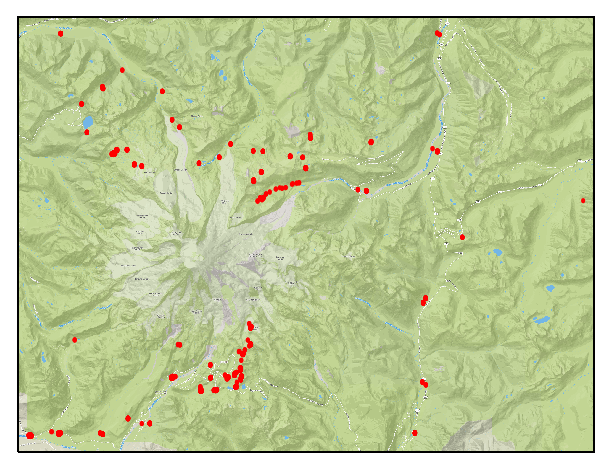

In [4]:
tiler = MapboxTiles(token, 'mapbox.streets')
mercator = tiler.crs
ax = plt.axes(projection=mercator)
ax.set_extent(bounds)
ax.add_geometries(snowcover.dropna().geometry.buffer(0.001), crs=crs.PlateCarree(), color='red')
ax.add_image(tiler, 13)

